<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/12-Perceptron-Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón Lineal
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar un perceptrón simple de regresión en Python. 



Los paquetes necesarios son:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')


---
## <font color='264CC7'> Ejemplo 1</font>

Generamos datos que sigan una tendencia lineal:

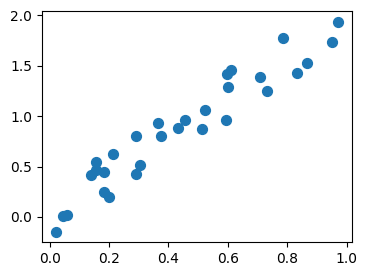

In [2]:
# Generamos los datos
np.random.seed(42)

X = np.random.rand(30)
y = 2*X + (np.random.rand(30)-0.5)*0.5

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=50)
plt.show()


Con esto, podemos definir las siguientes funciones:
- Función de combinación: $a(w,x,b) = wx$
- Función de activación: $\sigma(a) = a$
- Función de pérdida: $\displaystyle L(\hat{y}, y) = \frac{1}{N}\sum_{i\leq N}(\hat{y}^{(i)}-y^{(i)})^2$

Con esto, 
$$L(\hat{y}, y) = \frac{1}{N}\sum_{i\leq N}(\sigma(a(x^{(i)},w,b))-y^{(i)})^2$$

Con esto, calculamos el gradiente de la función de pérdida calculando las derivadas parciales de la función de pérdida con respecto a los pesos $w$ y el sesgo $b$:
$$\begin{aligned}
    \frac{\partial L}{\partial w} &= \frac{\partial L}{\partial \sigma} \frac{\partial \sigma}{\partial a} \frac{\partial a}{\partial w} = \sum_{i\leq N}(\hat{y}^{(i)}-y^{(i)}) \cdot 1 \cdot x^{(i)} \\[3mm]
    \frac{\partial L}{\partial b} &= \frac{\partial L}{\partial \sigma} \frac{\partial \sigma}{\partial a} \frac{\partial a}{\partial b} = \sum_{i\leq N}(\hat{y}^{(i)}-y^{(i)}) \cdot 0 \cdot 1 = 0.
\end{aligned}$$

Definimos las funciones y sus derivadas:

In [3]:
# Función de combinación
def a(X, w, b):
    return w*X

# Función de activación
def s(a):
    return a

# Función de pérdida
def L(y_hat, y):
    return ((y_hat - y)**2).mean()

# Gradiente de la función de pérdida
def grad_L(y_hat, y, X):
    dLdw = 2 * np.mean((y_hat - y) * X)
    dLdb = 0
    return dLdw, dLdb

Definimos el entrenamiento del perceptrón:

In [4]:
# Entrenamiento
def fit(X, y, lr=0.1, epochs=20, verbose=True, random_state=42):
    np.random.seed(random_state)
    w = np.random.rand()
    b = 0
    for epoch in range(epochs):
        y_hat = s(a(X, w, b))
        dLdw, dLdb = grad_L(y_hat, y, X)
        w -= lr * dLdw
        b -= lr * dLdb
        if epoch % 10 == 0 and verbose:
            print(f'Epoch {epoch}, Loss: {L(y_hat, y)}')
    if verbose:
        print(f'\nFinal. Epoch {epoch}, Loss: {L(y_hat, y)}')
    return w, b

### <font color='264CC7'> Entrenamiento </font>

Entrenamos el perceptrón:

In [5]:
# Planto la semilla para reproducibilidad
w, b = fit(X, y, epochs=50)
print(f'w: {w}')

Epoch 0, Loss: 0.7121103876919168
Epoch 10, Loss: 0.25253011381875057
Epoch 20, Loss: 0.10076569054270752
Epoch 30, Loss: 0.050649439951268076
Epoch 40, Loss: 0.03409985264268289

Final. Epoch 49, Loss: 0.028950493405566914
w: 1.8702980258468147


Visualizamos los resultados:

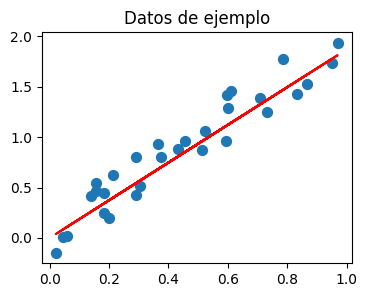

In [6]:
# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=50)
plt.plot(X, s(a(X, w, b)), c='r')
plt.title('Datos de ejemplo')
plt.show()


Visualicemos el entrenamiento:

In [ ]:
# Configuración inicial de la figura y subplots
fig, (ax_loss, ax_modelo) = plt.subplots(1, 2, figsize=(8, 3))

# Graficar la función de pérdida
ws = np.linspace(0, 4, 100)
Ls = [L(y, s(a(X, w, 0))) for w in ws]
ax_loss.plot(ws, Ls)
ax_loss.set_title('Función de costo')
scatter_loss = ax_loss.scatter([], [], s=50, color='blue')
# Graficar los datos y configurar el subplot de entrenamiento
ax_modelo.scatter(X, y, s=50, color='blue')
line_modelo, = ax_modelo.plot([], [], 'r')
ax_modelo.set_xlim(0, X.max() + 0.1)
ax_modelo.set_ylim(0, y.max() + 1)
ax_modelo.set_title('Entrenamiento del Modelo')
texto_epoca = ax_modelo.text(0.02, 0.95, '', transform=ax_modelo.transAxes)
xs = np.linspace(0, 1, 100)

# Función de actualización para la animación
def actualizar(frame):
    w, b = fit(X, y, epochs=frame, verbose=False)
    line_modelo.set_data(xs, s(a(xs, w, 0)))
    texto_epoca.set_text(f'Época: {frame}')
    scatter_loss.set_offsets([[w, L(y, s(a(X, w, 0)))]])
    return line_modelo, texto_epoca, scatter_loss
# Crear y configurar la animación
animacion = FuncAnimation(
    fig, actualizar, frames=range(1, 50),
    interval=300, blit=True, repeat=False
)

plt.tight_layout()
plt.close()
animacion

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Prueba algunos hiperparámetros y observa cómo cambia el entrenamiento.
<ul>
  <li>Selecciona una tasa de aprendizaje muy pequeña y observa cómo cambia el entrenamiento.</li>
  <li>Selecciona una tasa de aprendizaje grande y observa cómo cambia el entrenamiento.</li>
  <li>Selecciona una tasa de aprendizaje muy grande y observa cómo cambia el entrenamiento.</li>
</ul>
</div>

---
## <font color='264CC7'> Ejemplo 2</font>

Generamos datos que sigan una tendencia lineal más una constante:

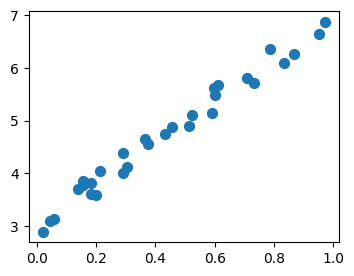

In [8]:
# Generamos los datos
np.random.seed(42)

X = np.random.rand(30)
y = 4*X + 3 + (np.random.rand(30)-0.5)*0.5

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=50)
plt.show()

Con esto, podemos definir las siguientes funciones:
- Función de combinación: $a(w,x,b) = wx+b$
- Función de activación: $\sigma(a) = a$
- Función de costo: $\displaystyle L(\hat{y}, y) = \frac{1}{N}\sum_{i\leq N}(\hat{y}^{(i)}-y^{(i)})^2$

Con esto, 
$$L(\hat{y}, y) = \frac{1}{N}\sum_{i\leq N}(\sigma(a(x^{(i)},w,b))-y^{(i)})^2$$

Con esto, calculamos el gradiente de la función de costo calculando las derivadas parciales de la función de costo con respecto a los pesos $w$ y el sesgo $b$:
$$\begin{aligned}
    \frac{\partial L}{\partial w} &= \frac{\partial L}{\partial \sigma} \frac{\partial \sigma}{\partial a} \frac{\partial a}{\partial w} = \sum_{i\leq N}(\hat{y}^{(i)}-y^{(i)}) \cdot 1 \cdot x^{(i)} \\[3mm]
    \frac{\partial L}{\partial b} &= \frac{\partial L}{\partial \sigma} \frac{\partial \sigma}{\partial a} \frac{\partial a}{\partial b} = \sum_{i\leq N}(\hat{y}^{(i)}-y^{(i)}) \cdot 1 \cdot 1 = \sum_{i\leq N}(\hat{y}^{(i)}-y^{(i)}).
\end{aligned}$$

Definimos las funciones y sus derivadas:

In [9]:
# Función de combinación
def a(X, w, b):
    return w*X + b

# Función de activación
def s(a):
    return a

# Función de costo
def L(y_hat, y):
    return ((y_hat - y)**2).mean()

# Gradiente de la función de costo
def grad_L(y_hat, y, X):
    dLdw = 2 * np.mean((y_hat - y) * X)
    dLdb = 2 * np.mean(y_hat - y)
    return dLdw, dLdb

Definimos el entrenamiento del perceptrón:

In [10]:
# Entrenamiento
def fit(X, y, lr=0.1, epochs=20, verbose=True, random_state=42):
    np.random.seed(random_state)
    w = np.random.rand()
    b = np.random.rand()
    for epoch in range(epochs):
        y_hat = s(a(X, w, b))
        dLdw, dLdb = grad_L(y_hat, y, X)
        w -= lr * dLdw
        b -= lr * dLdb
        if epoch % 10 == 0 and verbose:
            print(f'Epoch {epoch}, Loss: {L(y_hat, y)}')
    if verbose:
        print(f'\nFinal. Epoch {epoch}, Loss: {L(y_hat, y)}')
    return w, b

### <font color='264CC7'> Entrenamiento </font>

Entrenamos el perceptrón:

In [11]:
# Planto la semilla para reproducibilidad
w, b = fit(X, y, epochs=100)
print(f'w: {w}, b: {b}')

Epoch 0, Loss: 14.219361715676625
Epoch 10, Loss: 0.34537315506397054
Epoch 20, Loss: 0.2299991467331134
Epoch 30, Loss: 0.1834085096391042
Epoch 40, Loss: 0.1475643910216654
Epoch 50, Loss: 0.11985713748144261
Epoch 60, Loss: 0.09843909589450969
Epoch 70, Loss: 0.08188268897796343
Epoch 80, Loss: 0.0690843848446961
Epoch 90, Loss: 0.05919113992061302

Final. Epoch 99, Loss: 0.05222277936301369
w: 3.3285408330518593, b: 3.3100184522189156


Visualizamos los resultados:

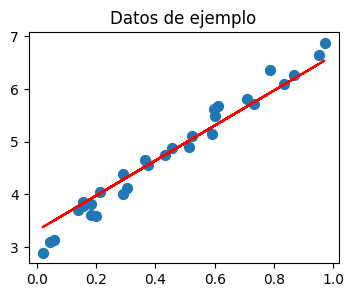

In [12]:
# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=50)
plt.plot(X, s(a(X, w, b)), c='r')
plt.title('Datos de ejemplo')
plt.show()


Visualicemos el entrenamiento:

In [ ]:
# Configuración inicial de la figura y subplots
fig, ax_modelo = plt.subplots(figsize=(4, 3))

# Graficar los datos y configurar el subplot de entrenamiento
ax_modelo.scatter(X, y, s=50, color='blue')
line_modelo, = ax_modelo.plot([], [], 'r')
ax_modelo.set_xlim(0, X.max() + 0.1)
ax_modelo.set_ylim(0, y.max() + 1)
ax_modelo.set_title('Entrenamiento del Modelo')
texto_epoca = ax_modelo.text(0.02, 0.95, '', transform=ax_modelo.transAxes)
xs = np.linspace(0, 1, 100)

# Función de actualización para la animación
def actualizar(frame):
    w, b = fit(X, y, epochs=frame, verbose=False)
    line_modelo.set_data(xs, s(a(xs, w, b)))
    texto_epoca.set_text(f'Época: {frame}')
    scatter_loss.set_offsets([[w, L(y, s(a(X, w, b)))]])
    return line_modelo, texto_epoca, scatter_loss
# Crear y configurar la animación
animacion = FuncAnimation(
    fig, actualizar, frames=range(1, 100),
    interval=100, blit=True, repeat=False
)

plt.tight_layout()
plt.close()
animacion

---
## <font color='264CC7'> Entrenamiento por bloques</font>

Regresemos al Ejemplo 1. En lugar de actualizar los pesos después de cada muestra, actualicemos los pesos después de cada bloque de muestras.

In [14]:
# Generamos los datos
np.random.seed(42)
X = np.random.rand(30)
y = 2*X + (np.random.rand(30)-0.5)*0.5

# Función de combinación
def a(X, w, b):
    return w*X

# Función de activación
def s(a):
    return a

# Función de costo
def L(y_hat, y):
    return ((y_hat - y)**2).mean()

# Gradiente de la función de costo
def grad_L(y_hat, y, X):
    dLdw = 2 * np.mean((y_hat - y) * X)
    dLdb = 0
    return dLdw, dLdb

# Entrenamiento
def fit(X, y, lr=0.1, epochs=20, verbose=True, batch_size = 10, random_state=42):
    np.random.seed(random_state)
    w = np.random.rand()
    b = 0
    batches = len(X) // batch_size
    for epoch in range(epochs):
        for i in range(batches):
            X_batch = X[i*batch_size:(i+1)*batch_size]
            y_batch = y[i*batch_size:(i+1)*batch_size]
            y_hat = s(a(X_batch, w, b))
            dLdw, dLdb = grad_L(y_hat, y_batch, X_batch)
            w -= lr * dLdw
            b -= lr * dLdb
        if epoch % 10 == 0 and verbose:
            print(f'Epoch {epoch}, Loss: {L(y_hat, y_batch)}')
    if verbose:
        print(f'\nFinal. Epoch {epoch}, Loss: {L(y_hat, y_batch)}')
    return w, b
        


### <font color='264CC7'> Entrenamiento </font>

Entrenamos el perceptrón:

In [15]:
# Planto la semilla para reproducibilidad
w, b = fit(X, y, epochs=50, batch_size=1)
print(f'w: {w}')

Epoch 0, Loss: 0.005355871288147238
Epoch 10, Loss: 0.007505783495577558
Epoch 20, Loss: 0.007505783578076452
Epoch 30, Loss: 0.007505783578076452
Epoch 40, Loss: 0.007505783578076452

Final. Epoch 49, Loss: 0.007505783578076452
w: 1.9841487950188106
